In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

# Display preferences
%matplotlib inline

### Iris Dataset

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [14]:
# Standardization
scaler = StandardScaler()
X_std_iris = scaler.fit_transform(X)

In [13]:
def kmeans_visual(X):
    pca = PCA(n_components=2).fit_transform(X)

    colors = 'rbg'

    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
                 color=colors[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
                )
    
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

K-Means 1



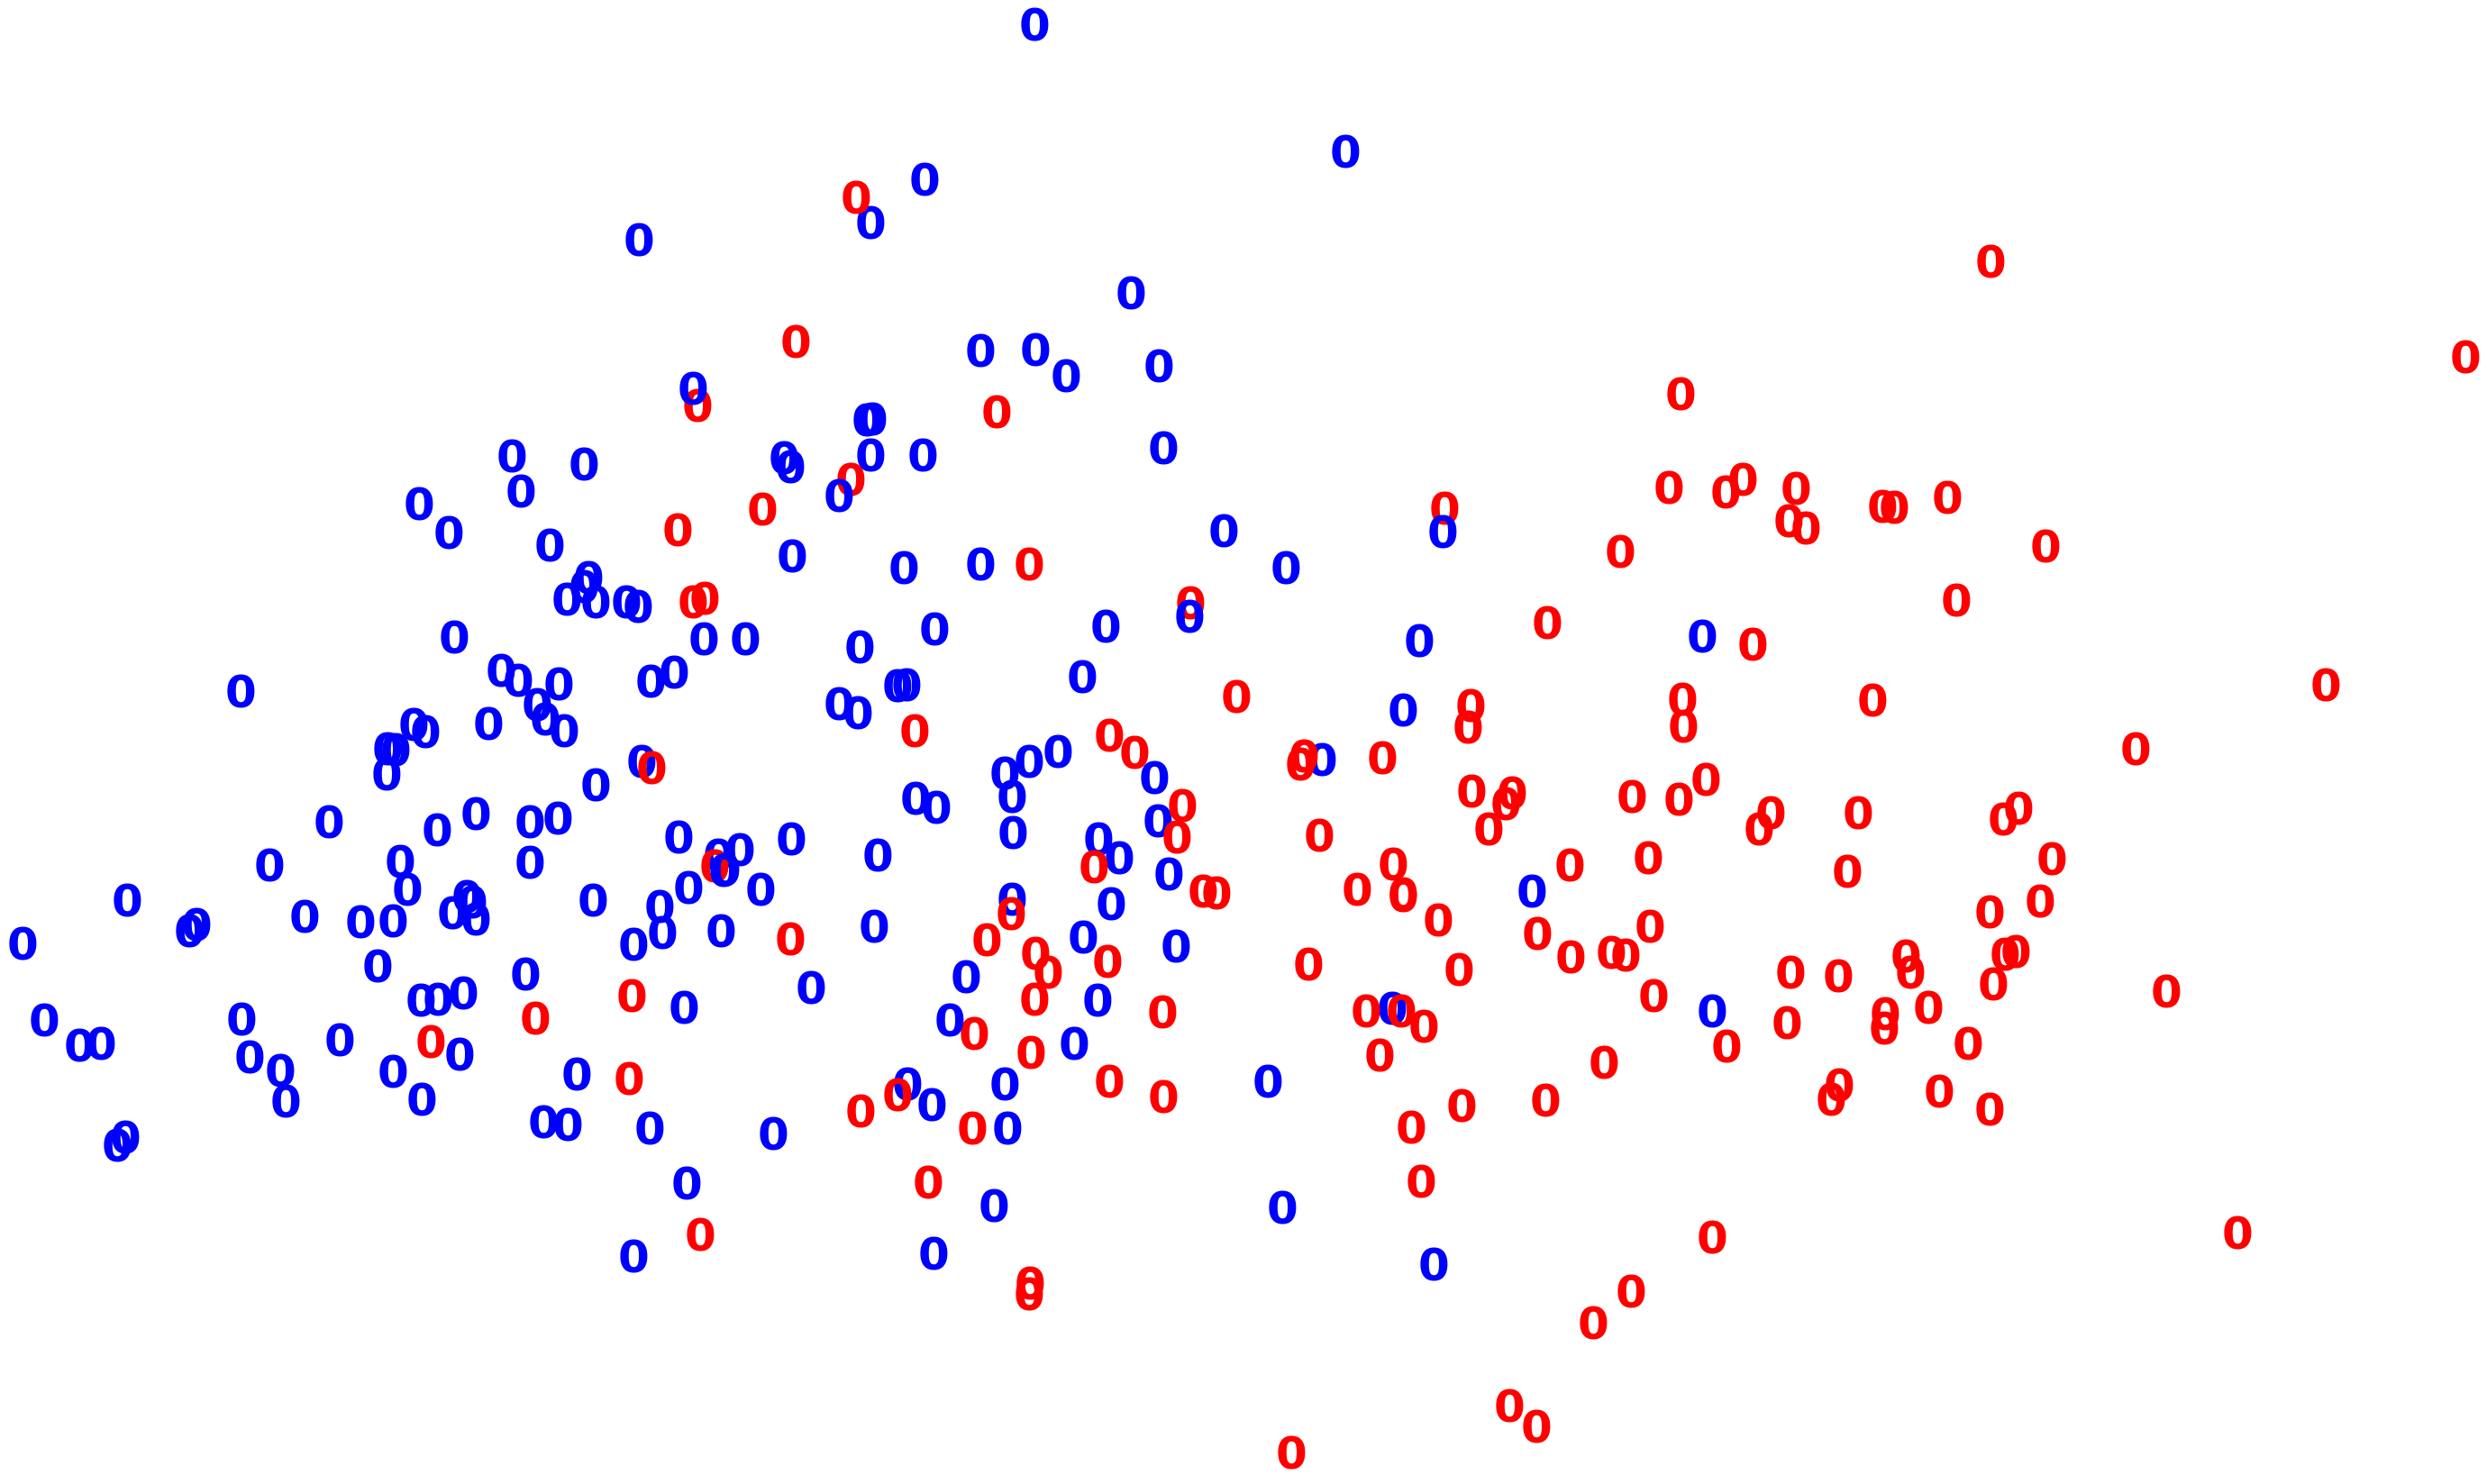

K-Means 2



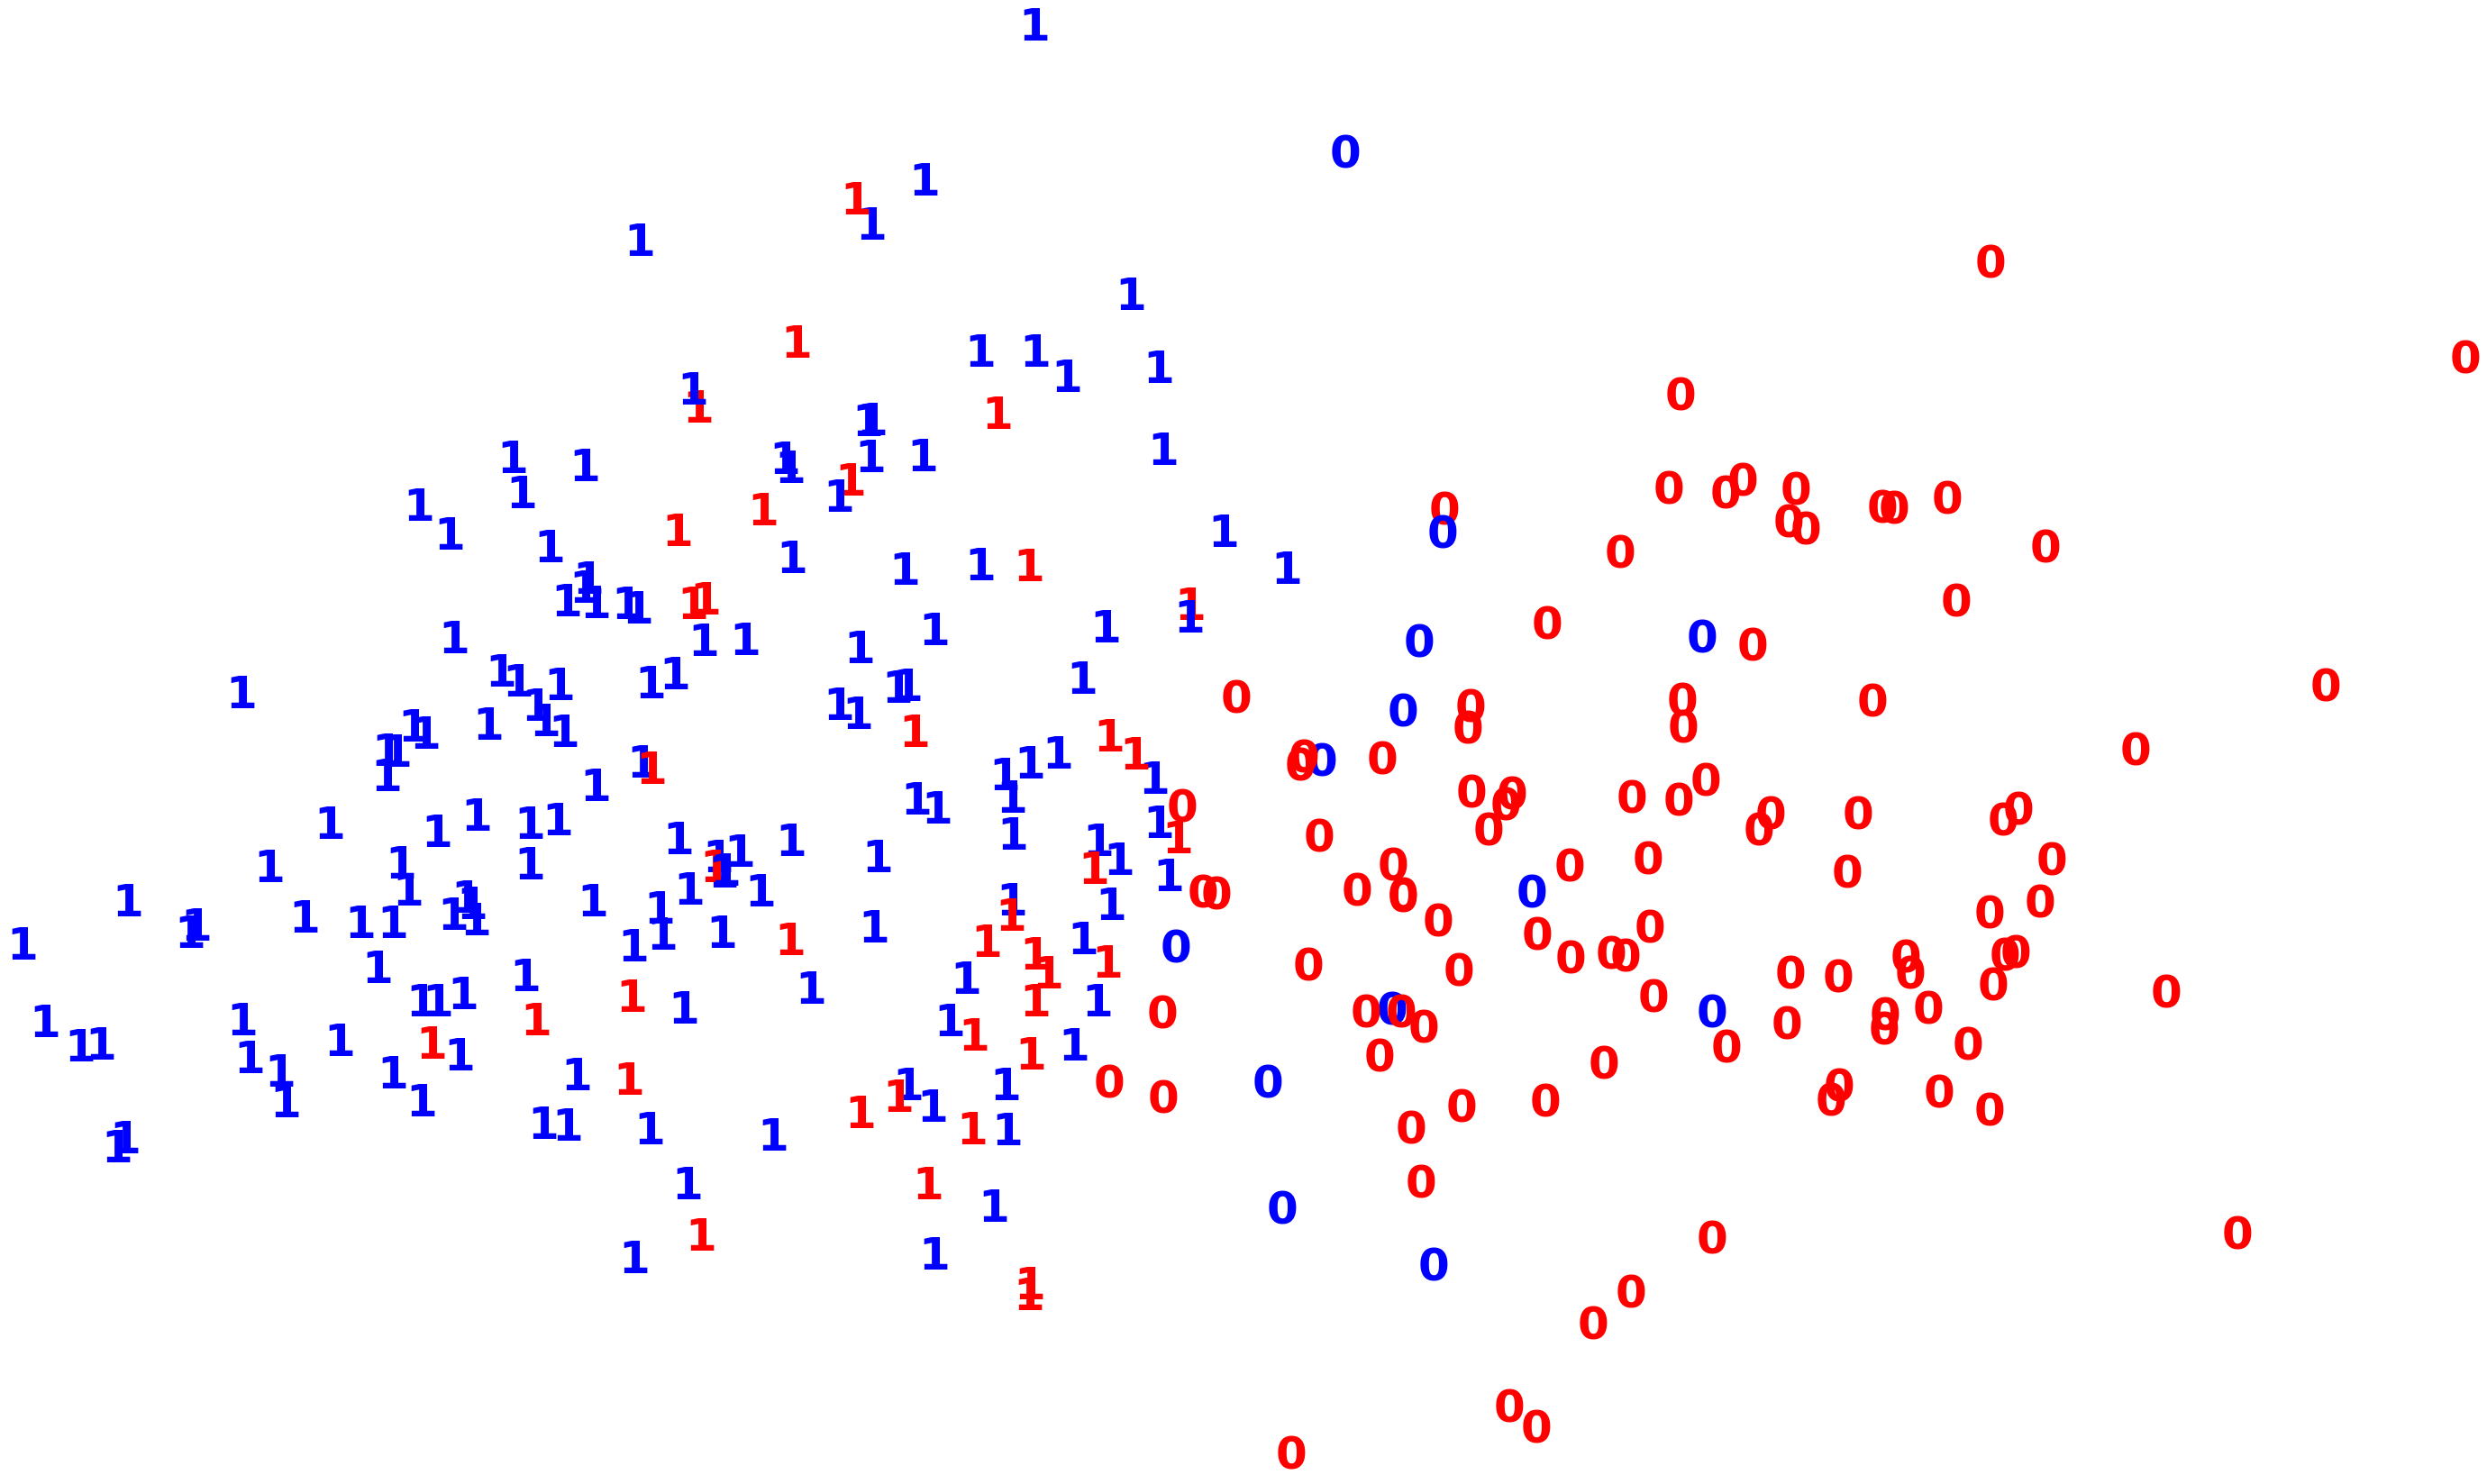

K-Means 3



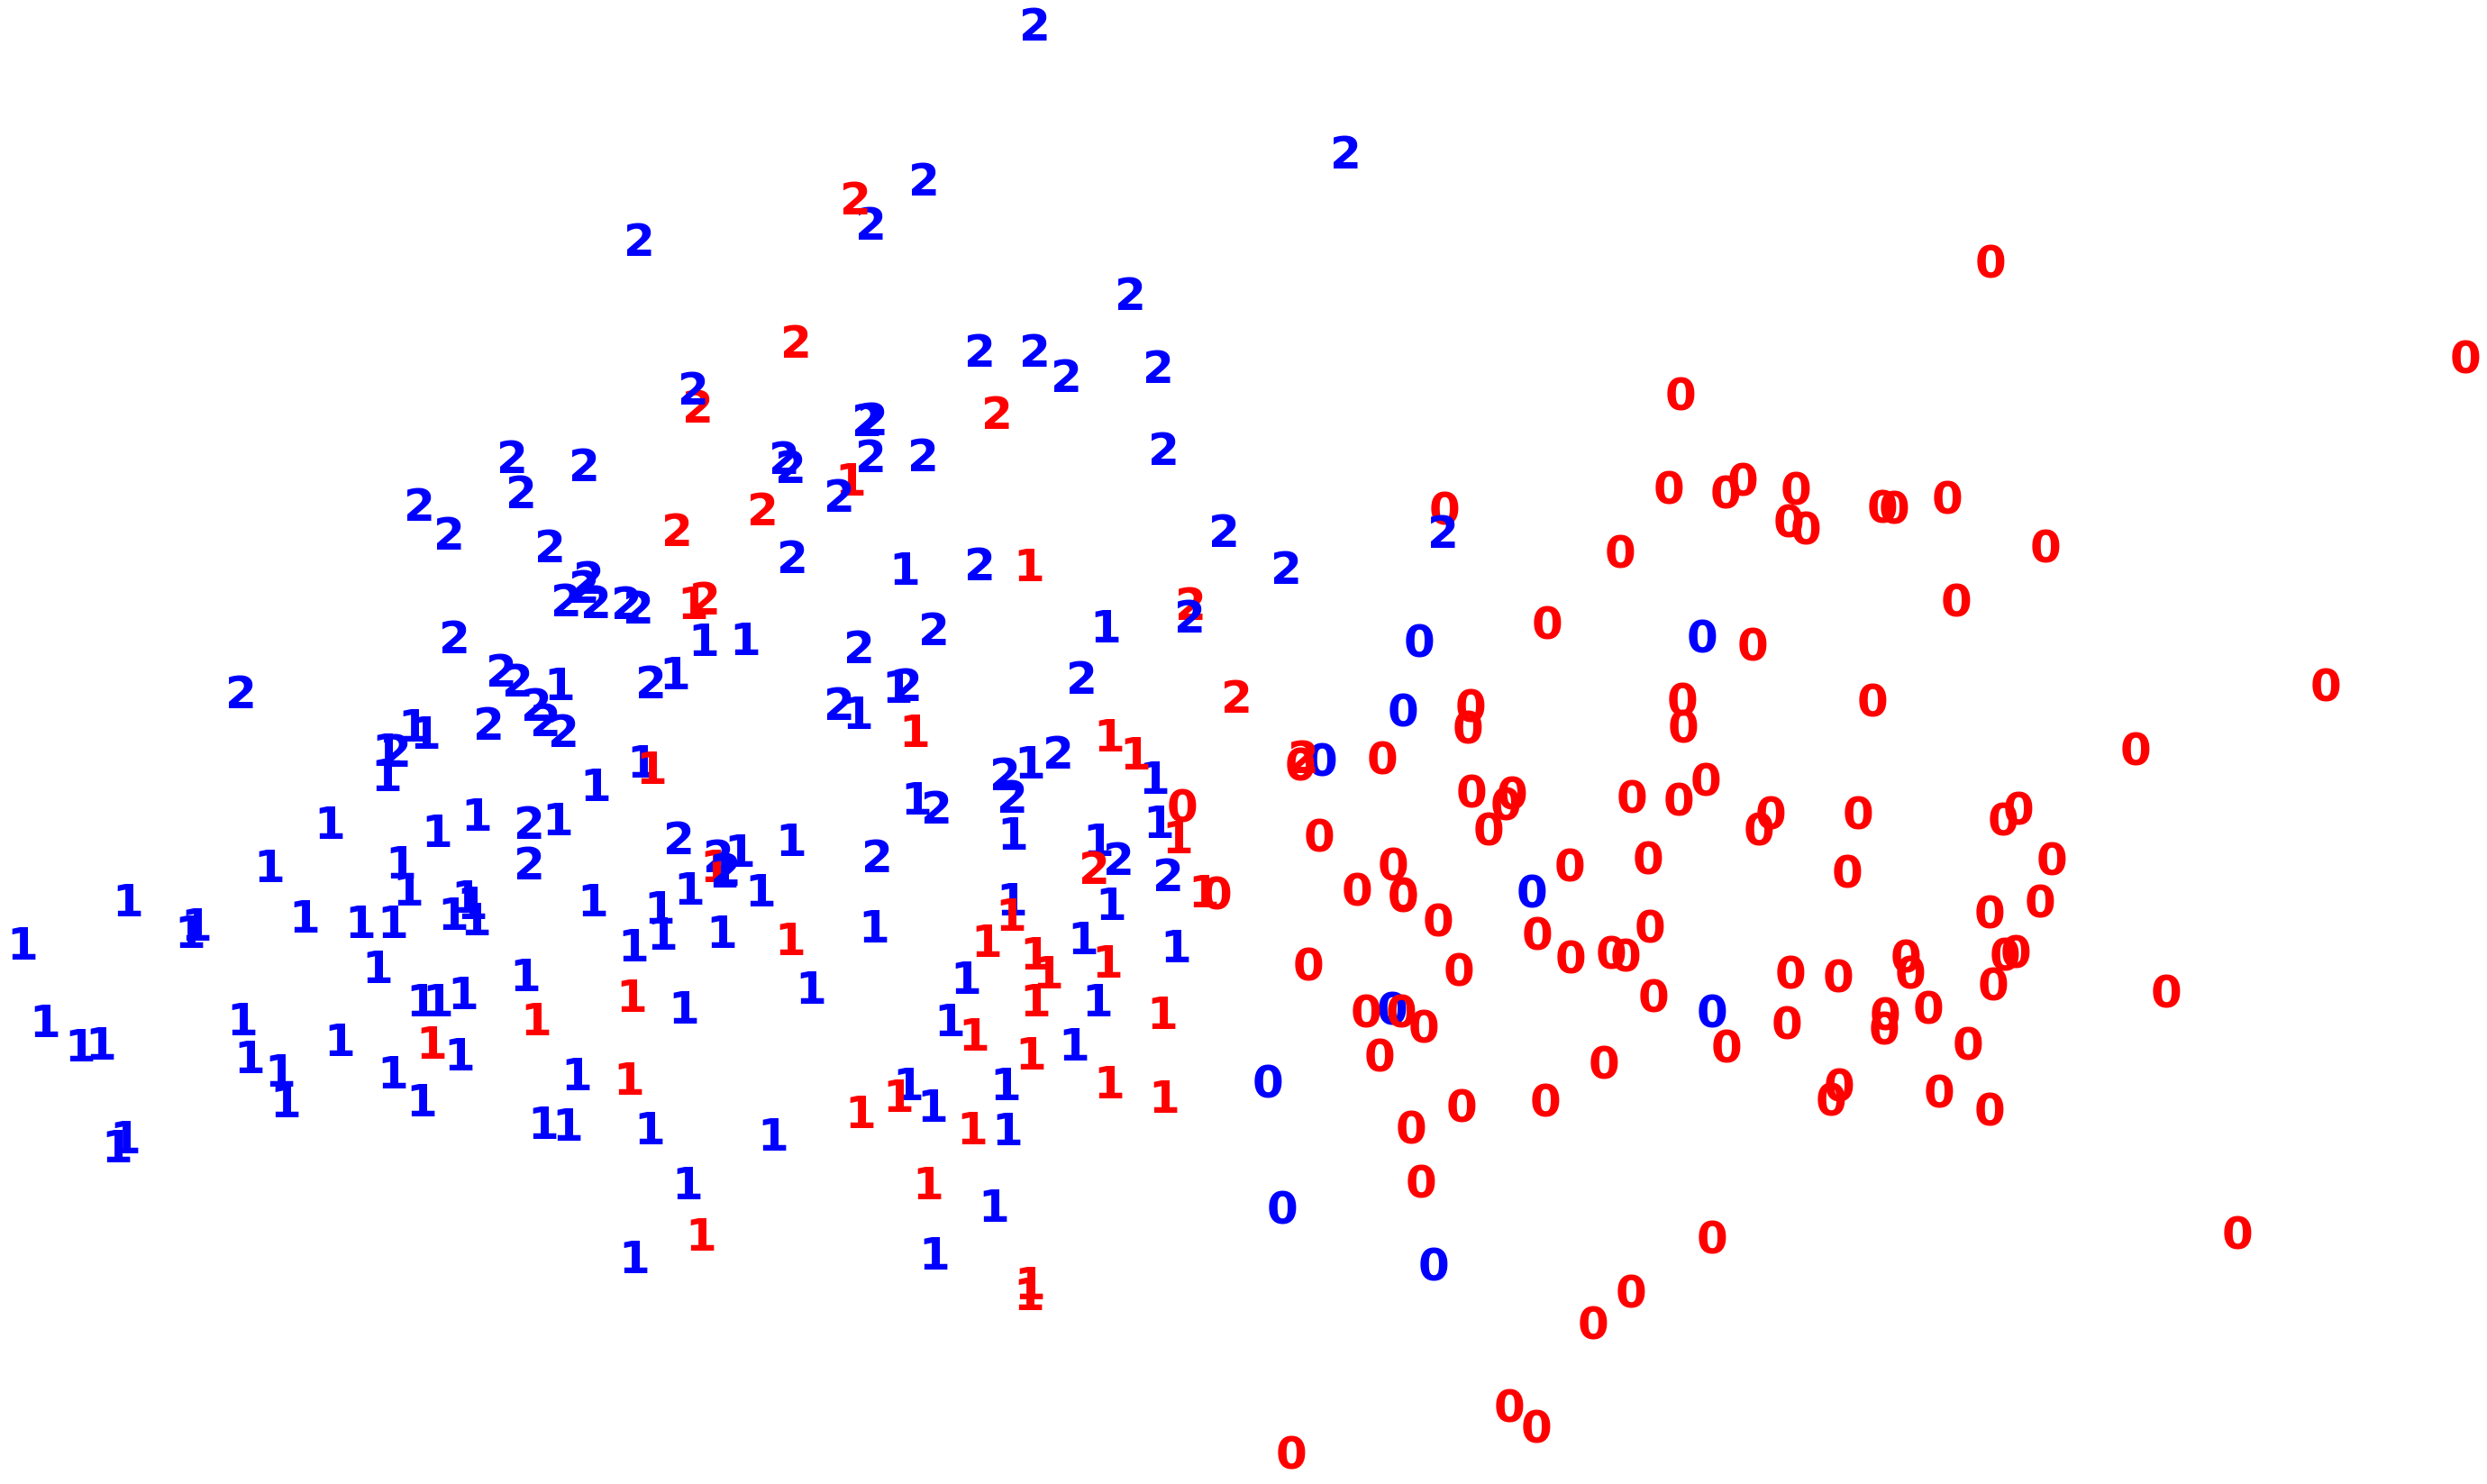

K-Means 4



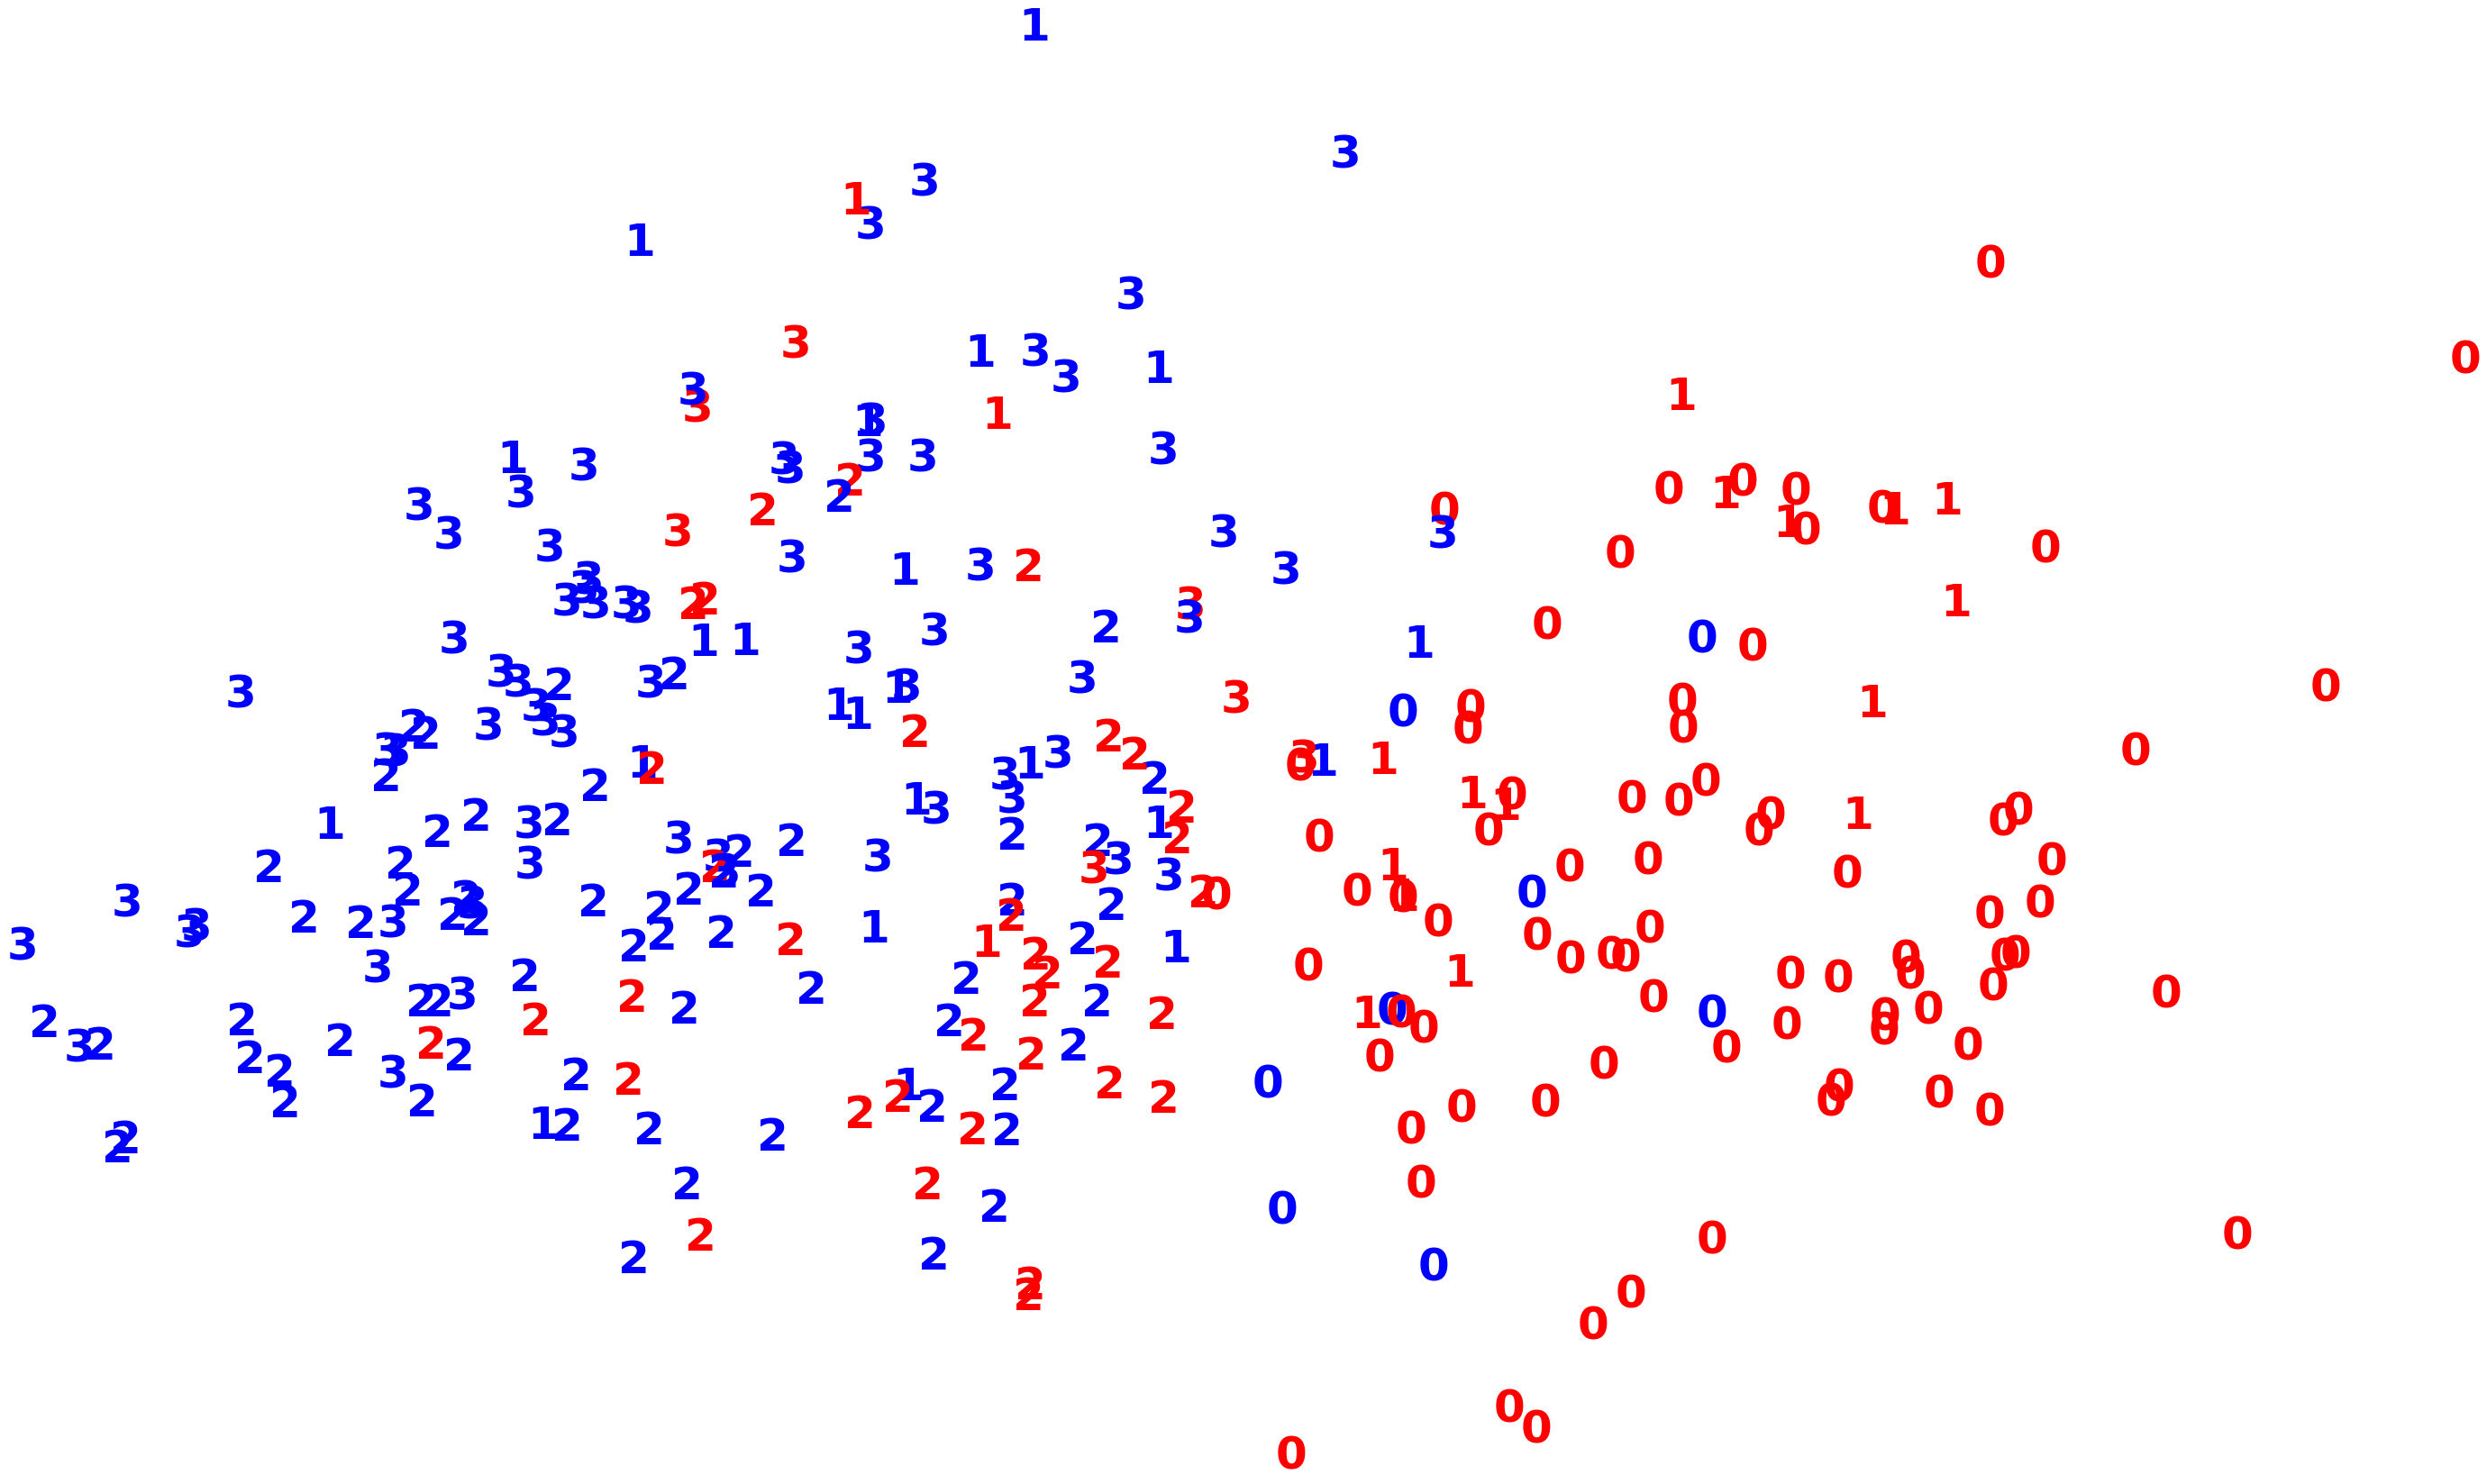

K-Means 5



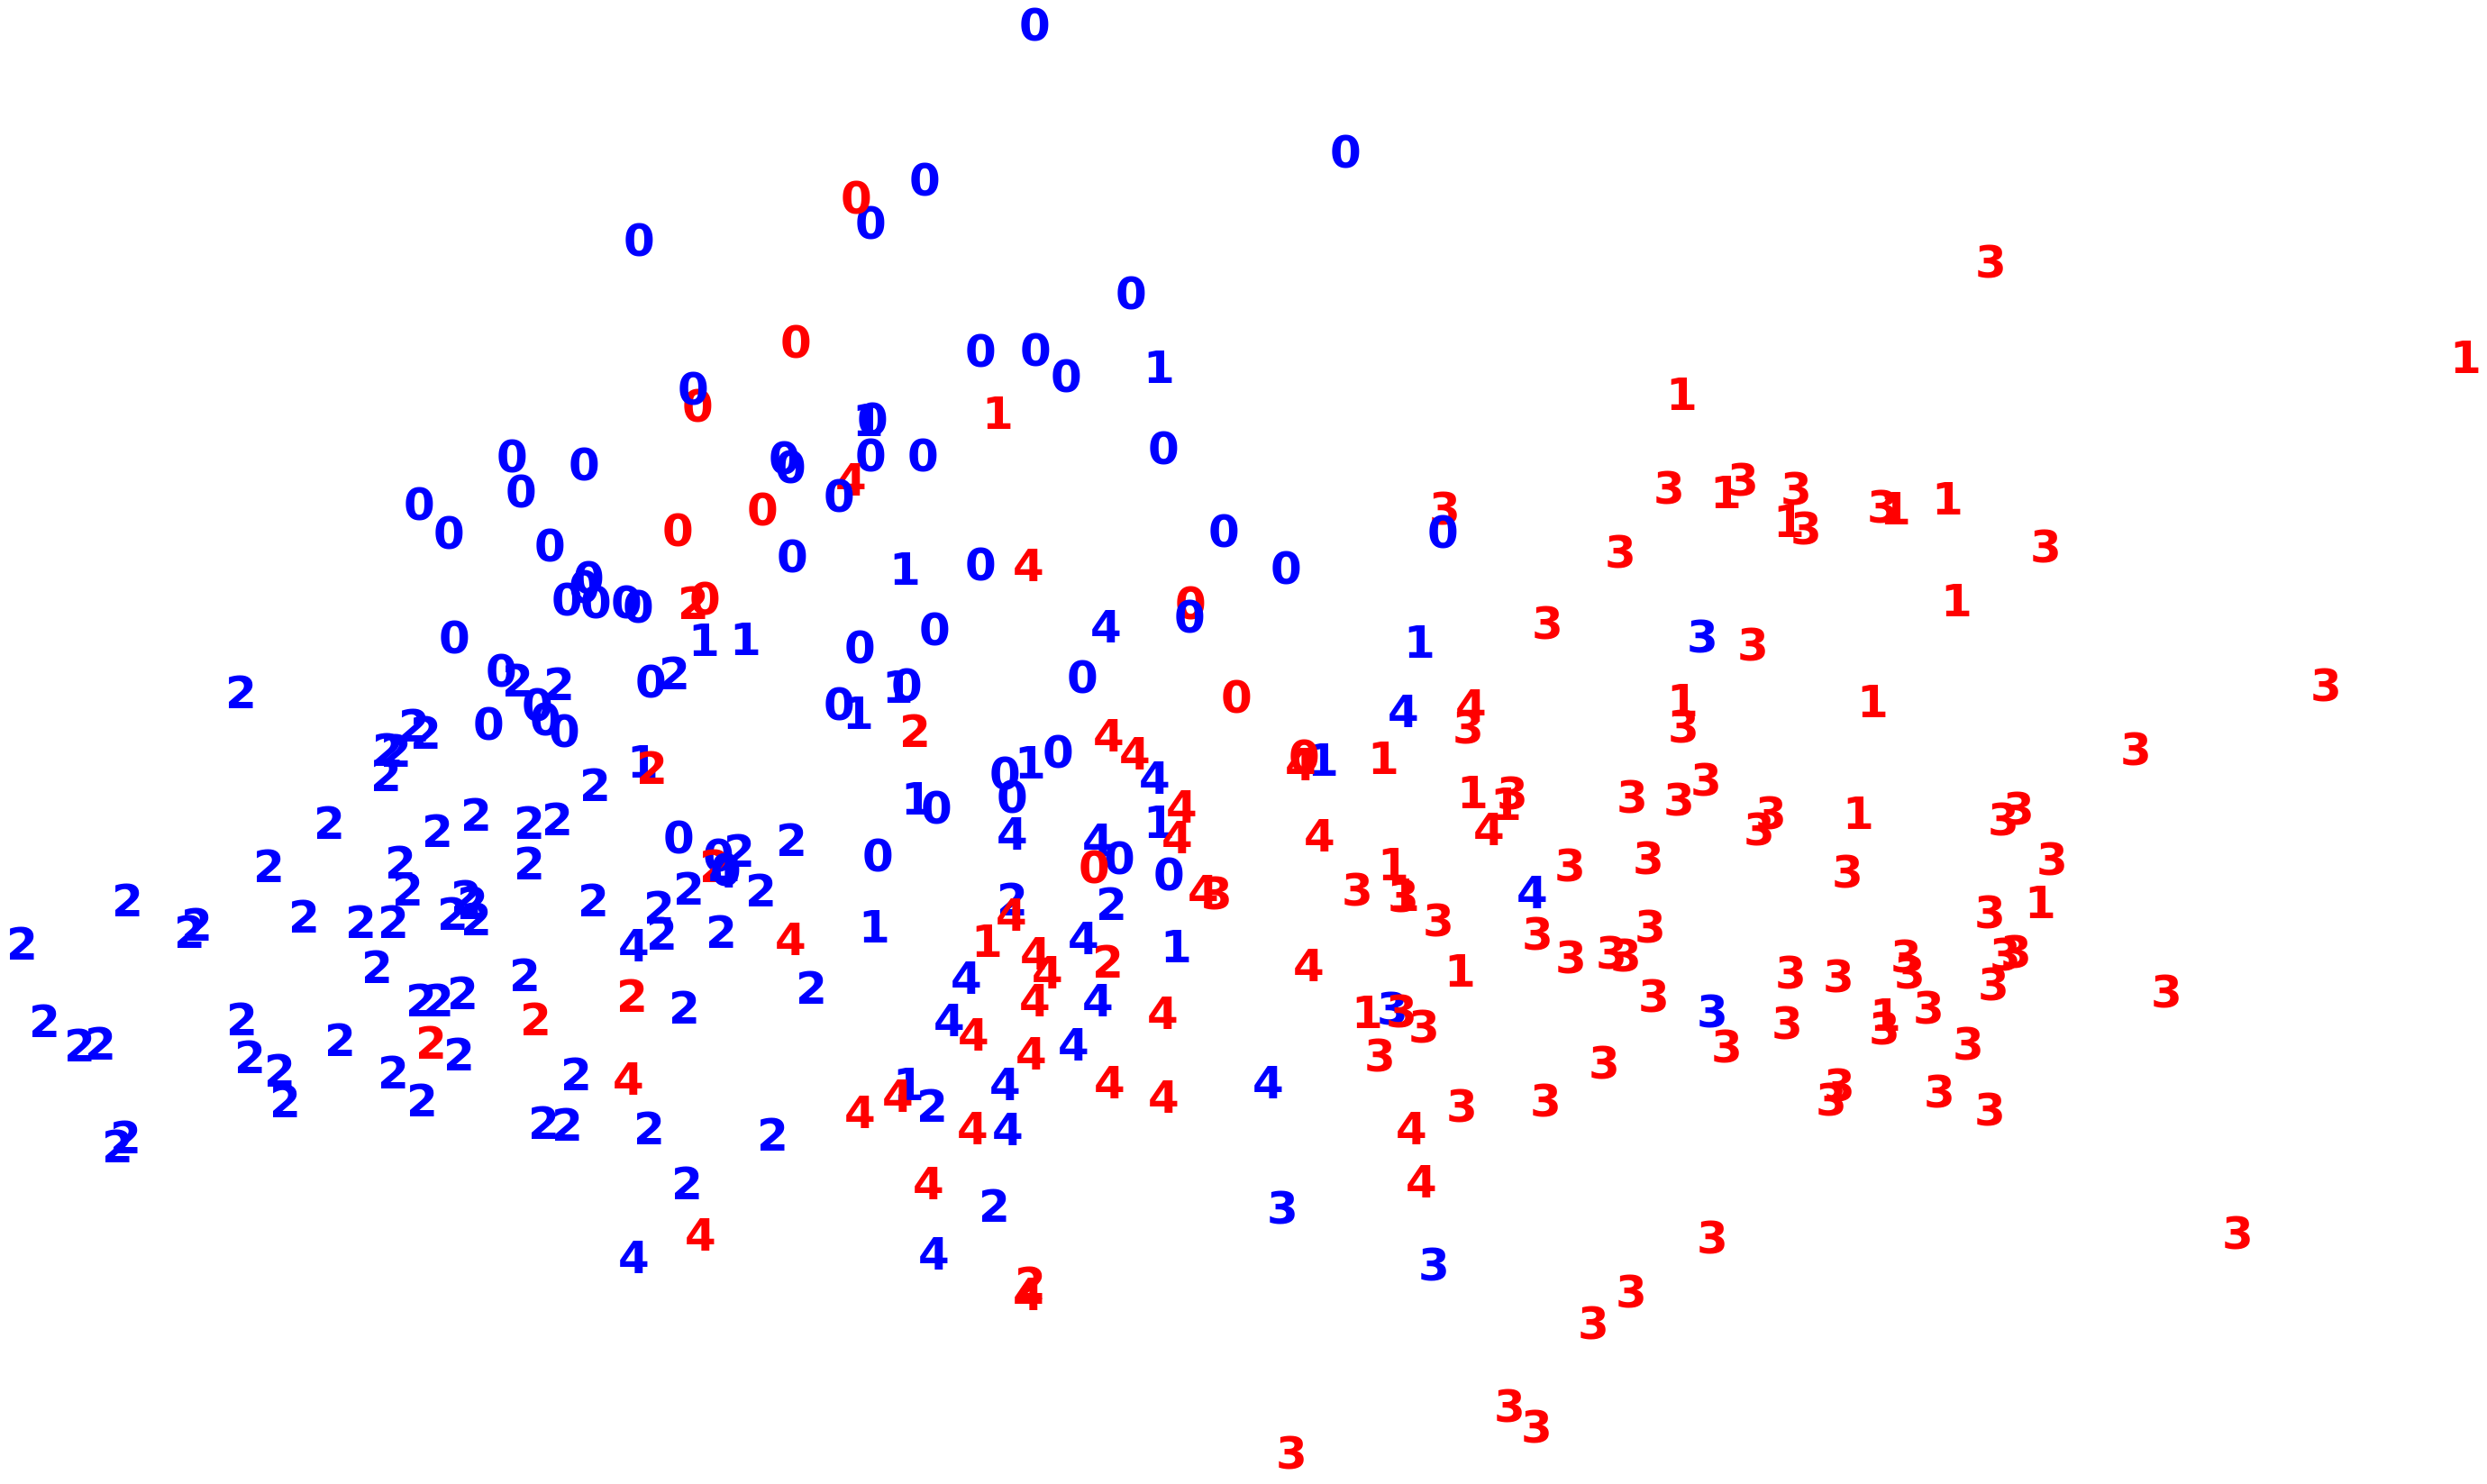

K-Means 6



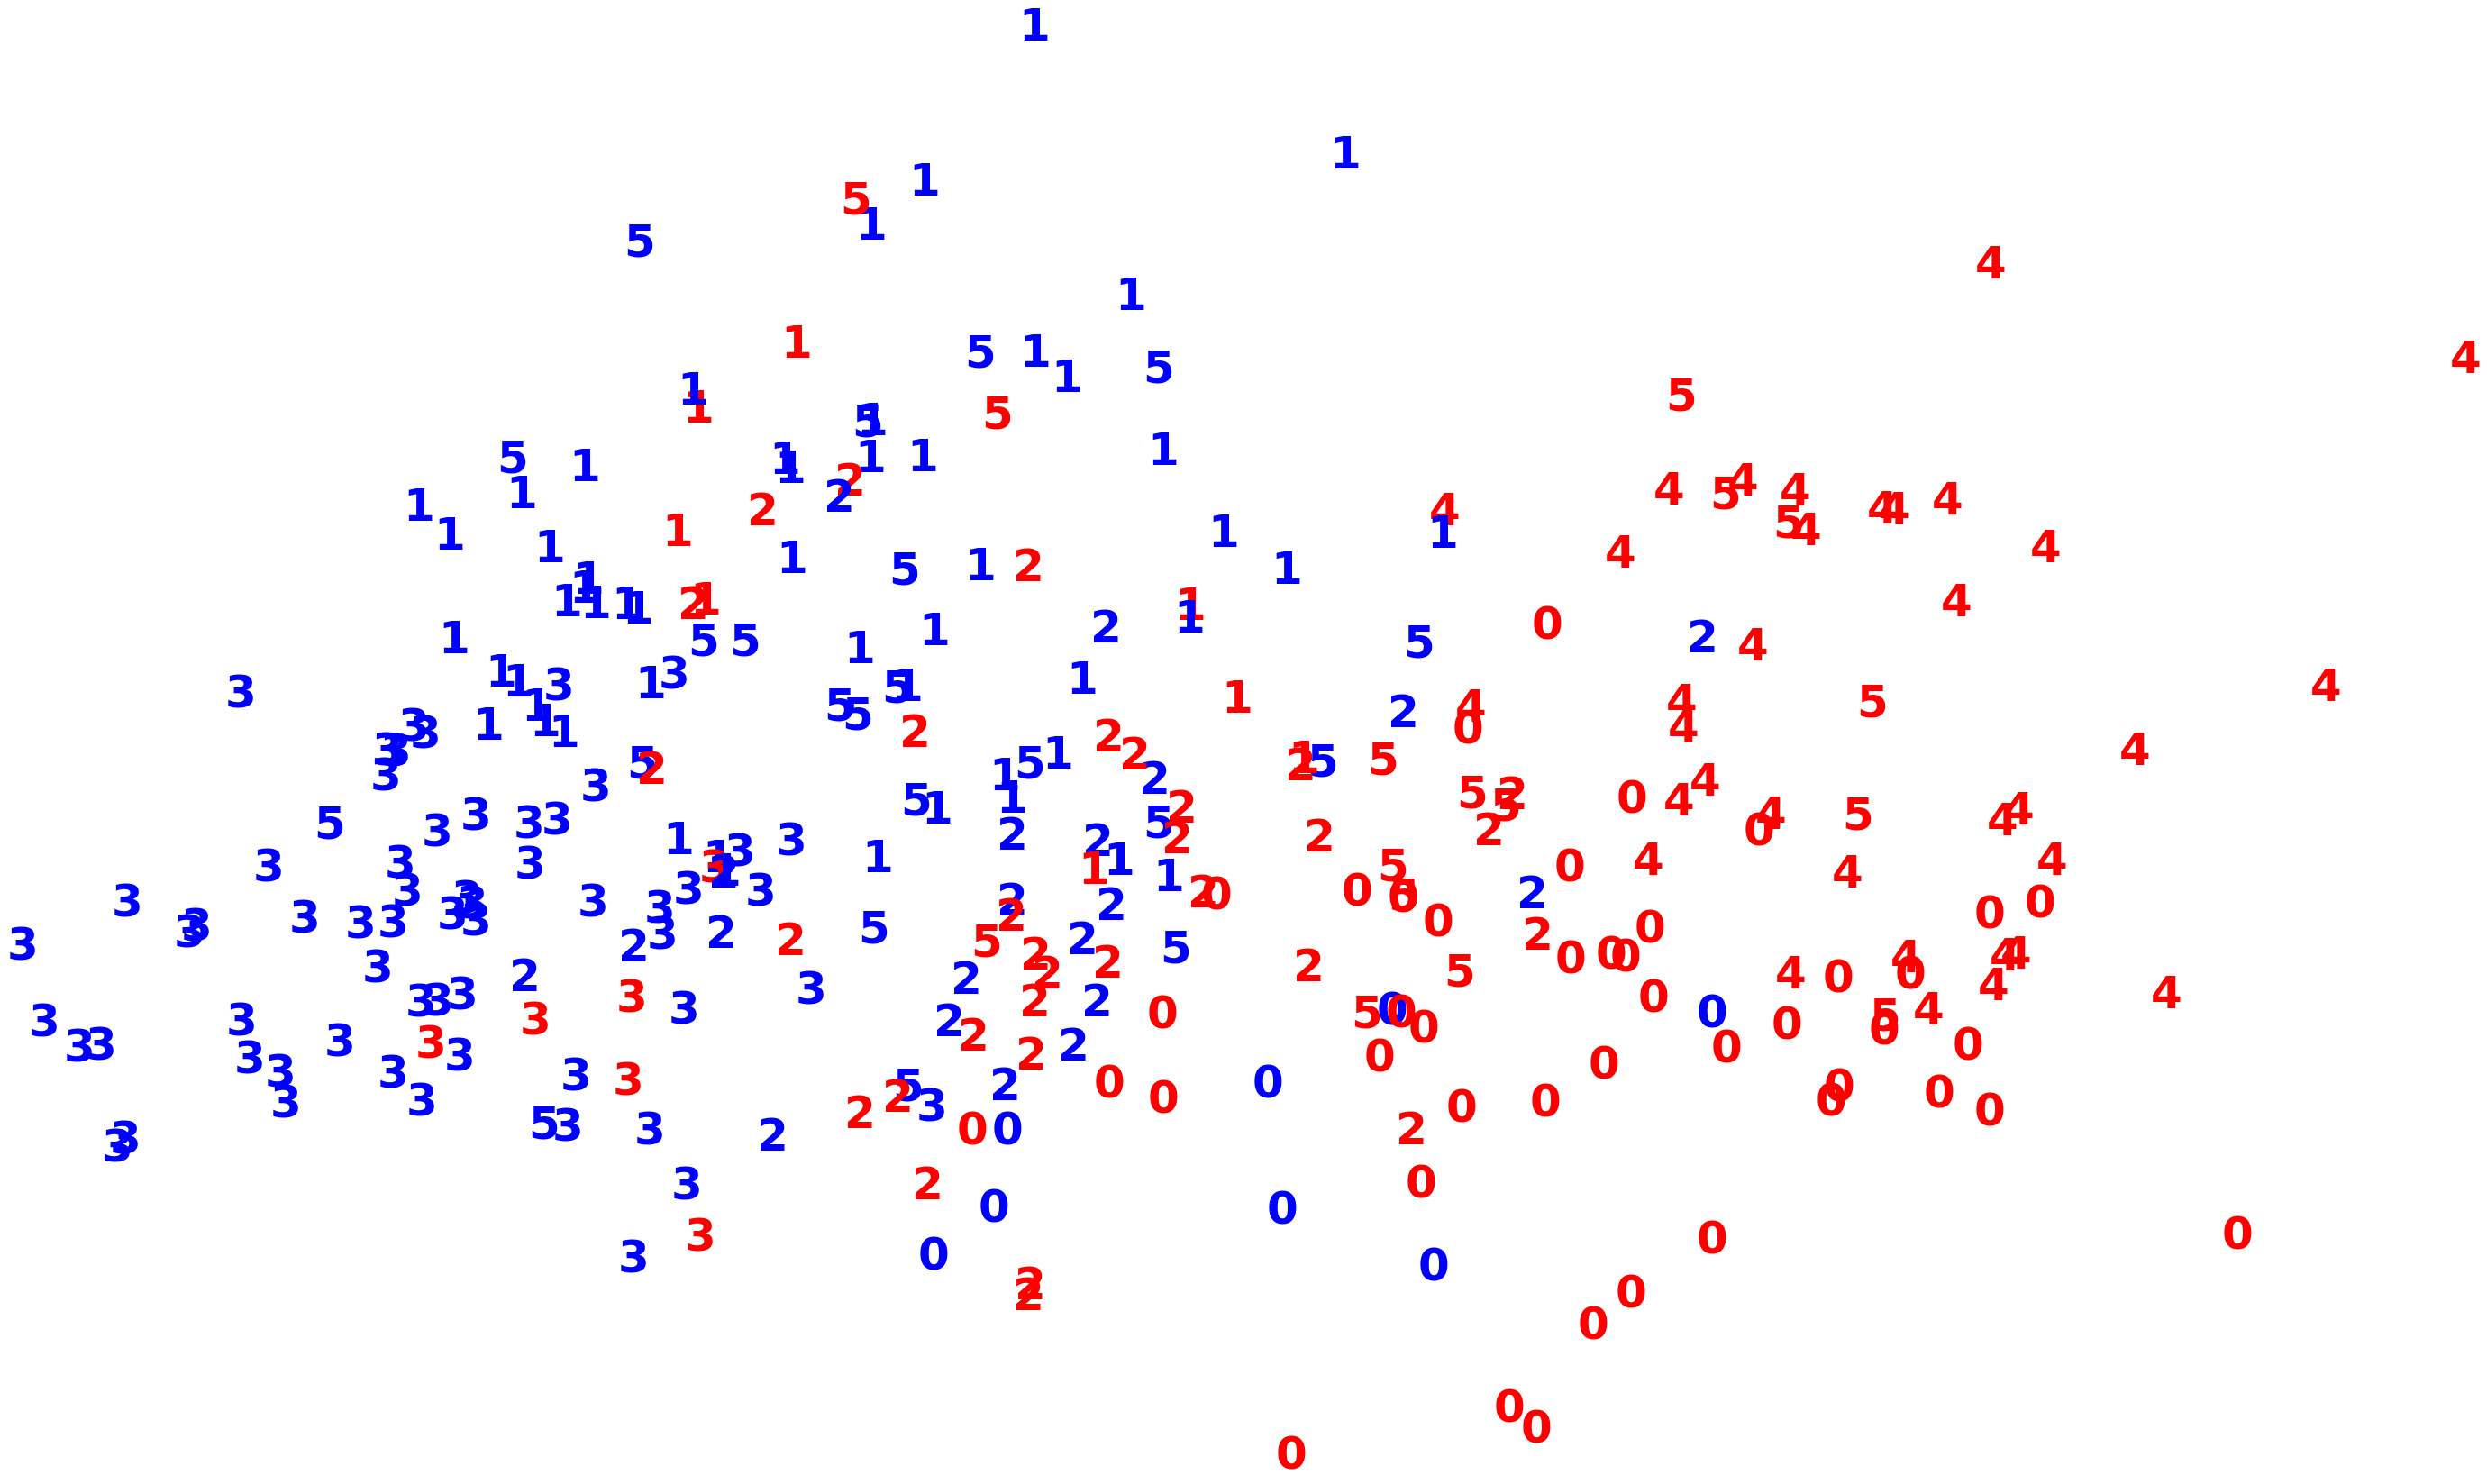

In [16]:
kmeans_options = [1, 2, 3, 4, 5, 6]

for i in range(1, 7):
    kmeans_cluster = KMeans(n_clusters=i)
    kmeans_cluster.fit(X_std_iris)
    y_pred = kmeans_cluster.predict(X_std_iris)
    print('K-Means {}\n'.format(str(i)))
    kmeans_visual(X_std_iris)

After reviewing the different visuals for K-Means, I still think K-Means of 3 is best. It seems values of 1 and 2 are to simple and 4, 5 and 6 are to complex.

### Heart Disease Dataset 

In [17]:
# Connection information
user = 'dsbc_student'
pw = '7*.8G9QH21'
host = '142.93.121.174'
port = '5432'
db = 'heartdisease'

In [18]:
# Establish connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, pw, host, port, db))

# Create dataframe
hd = pd.read_sql_query('select * from heartdisease', con=engine)

# Terminate connection
engine.dispose()

In [19]:
# Define features and the outcome
X = hd.iloc[:, :13]
y = hd.iloc[:, 13]

# Replace missing values with 0
X = X.replace(to_replace='?', value=0)

# Binarize
y = np.where(y > 0, 0, 1)

In [20]:
# Standardize
hd_scaler = StandardScaler()
X_std_heart = hd_scaler.fit_transform(X)

In [21]:
# Cluster
hd_kmeans_cluster = KMeans(n_clusters=2)

# Fit model
hd_kmeans_cluster.fit(X_std_heart)

# Predictions
y_preds = hd_kmeans_cluster.predict(X_std_heart)

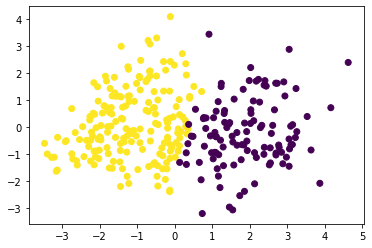

In [26]:
# PCA
pca = PCA(n_components=2).fit_transform(X_std_heart)

# Plot clusters
plt.scatter(pca[:, 0], pca[:, 1], c=y_preds)
plt.show()